<a href="https://colab.research.google.com/github/bwsi-hadr/2019-student-final-exercise/blob/master/Planning_Hospital_Lee_Joseph_Final_exercise_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# need to specify location of some certificates for rasterio
!export CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt
!sudo mkdir -p /etc/pki/tls/certs
!sudo cp /etc/ssl/certs/ca-certificates.crt /etc/pki/tls/certs/ca-bundle.crt
try:
  import rasterio
  import rasterio.plot
  import rasterio.merge 
  import rasterio.mask
except:
  !pip install rasterio
  import rasterio
  import rasterio.plot
  import rasterio.merge
  import rasterio.mask
  
try:
  import rasterstats as rs
except:
  !pip install rasterstats  
  import rasterstats as rs
  
try:
  import pyproj
except:
  !pip install pyproj
  import pyproj
  
import networkx as nx
try:
  import osmnx as ox
except:
  # osmnx depends on the system package libspatialindex
  !apt install libspatialindex-dev
  !pip install osmnx
  import osmnx as ox

try: 
  import geopandas as gpd
except: 
  !pip install geopandas 
  import geopandas as gpd
  
try:
  import contextily as ctx 
except:
  # install dependencies for contextily
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  # install contextily
  !pip install contextily==1.0rc1 --no-use-pep517 --no-cache-dir
  import contextily as ctx
  
import fiona
from shapely.geometry import Point, LineString, Polygon
  
import gdal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/BWSI-Remote-Sensing/'Final_exercise'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/BWSI-Remote-Sensing/Final_exercise


#Base Grid and Directory

In [0]:
base_grid = gpd.read_file('game_grid_export/game_grid_all_stats.shp')

In [69]:
base_grid
# -71.79092278136125 42.58943590354409

,MGRS,kmSQ_ID,GZD,EASTING,NORTHING,MGRS_10km,Shape_Leng,Shape_Le_1,Shape_Area,x_centroid,y_centroid,elevation,population,Health,Utility,Transporta,geometry
0,19TBH7019,BH,19T,270000mE,4719000mN,19TBH71,0.042364,0.042364,0.000110,-71.797211,42.593785,196.344985,443,10,7,8,POLYGON ((-71.79092278136125 42.58943590354409...
1,19TBH7119,BH,19T,271000mE,4719000mN,19TBH71,0.042364,0.042364,0.000110,-71.785036,42.594082,139.760744,381,10,7,8,POLYGON ((-71.77874932612048 42.58973201162303...
2,19TBH7219,BH,19T,272000mE,4719000mN,19TBH71,0.042364,0.042364,0.000110,-71.772862,42.594377,144.429830,318,10,7,8,POLYGON ((-71.76657568741803 42.59002682737616...
3,19TBH7319,BH,19T,273000mE,4719000mN,19TBH71,0.042365,0.042365,0.000110,-71.760687,42.594671,154.567869,182,10,7,3,POLYGON ((-71.75440186615322 42.59032035170287...
4,19TBH7419,BH,19T,274000mE,4719000mN,19TBH71,0.042365,0.042365,0.000110,-71.748513,42.594964,176.765537,115,10,7,3,POLYGON ((-71.74222786322531 42.59061258370377...
5,19TBH7519,BH,19T,275000mE,4719000mN,19TBH71,0.042365,0.042365,0.000110,-71.736338,42.595256,157.995852,147,10,7,3,POLYGON ((-71.73005367863436 42.59090352427819...
6,19TBH7619,BH,19T,276000mE,4719000mN,19TBH71,0.042366,0.042366,0.000110,-71.724163,42.595546,162.169816,149,10,7,3,POLYGON ((-71.71787931507833 42.59119317252686...
7,19TBH7719,BH,19T,277000mE,4719000mN,19TBH71,0.042366,0.042366,0.000110,-71.711987,42.595835,136.976414,122,10,7,3,POLYGON ((-71.70570477165785 42.59148152844978...
8,19TBH7819,BH,19T,278000mE,4719000mN,19TBH71,0.042366,0.042366,0.000110,-71.699812,42.596123,120.885051,111,10,7,3,POLYGON ((-71.69353005017166 42.59176859294621...
9,19TBH7919,BH,19T,279000mE,4719000mN,19TBH71,0.042366,0.042366,0.000110,-71.687636,42.596409,115.449512,137,10,7,3,POLYGON ((-71.68135515061971 42.59205436511684...


In [0]:
game_grid = gpd.read_file('game2/response_turn_2/curr_grid.shp')
# Transporta(tation) tells you 

In [71]:
game_grid['MGRS'] = base_grid['MGRS']
game_grid['population'] = base_grid['population']
game_grid.set_index('MGRS', inplace = True)
game_grid

,Health,Utility,Transporta,geometry,population
MGRS,,,,,
19TBH7019,5,10,5,POLYGON ((-71.79092278136125 42.58943590354409...,443
19TBH7119,1,10,4,POLYGON ((-71.77874932612048 42.58973201162303...,381
19TBH7219,1,10,1,POLYGON ((-71.76657568741803 42.59002682737616...,318
19TBH7319,5,10,1,POLYGON ((-71.75440186615322 42.59032035170287...,182
19TBH7419,4,10,1,POLYGON ((-71.74222786322531 42.59061258370377...,115
19TBH7519,4,10,1,POLYGON ((-71.73005367863436 42.59090352427819...,147
19TBH7619,5,10,1,POLYGON ((-71.71787931507833 42.59119317252686...,149
19TBH7719,5,8,1,POLYGON ((-71.70570477165785 42.59148152844978...,122
19TBH7819,6,10,1,POLYGON ((-71.69353005017166 42.59176859294621...,111


#Evacuation Grid

In [0]:
evac_grid = gpd.read_file('game2/prep_turn_0/evacuation.shp')

In [0]:
evac_grid.set_index('MGRS', inplace = True)

In [0]:
evac_grid

In [85]:
game_grid

,Health,Utility,Transporta,geometry,population
MGRS,,,,,
19TBH7019,5,10,5,POLYGON ((-71.79092278136125 42.58943590354409...,443
19TBH7119,1,10,4,POLYGON ((-71.77874932612048 42.58973201162303...,381
19TBH7219,1,10,1,POLYGON ((-71.76657568741803 42.59002682737616...,318
19TBH7319,5,10,1,POLYGON ((-71.75440186615322 42.59032035170287...,182
19TBH7419,4,10,1,POLYGON ((-71.74222786322531 42.59061258370377...,115
19TBH7519,4,10,1,POLYGON ((-71.73005367863436 42.59090352427819...,147
19TBH7619,5,10,1,POLYGON ((-71.71787931507833 42.59119317252686...,149
19TBH7719,5,8,1,POLYGON ((-71.70570477165785 42.59148152844978...,122
19TBH7819,6,10,1,POLYGON ((-71.69353005017166 42.59176859294621...,111


In [0]:
copy_game_grid = game_grid.copy()

pop_col = copy_game_grid.loc[evac_grid.index, 'population']
pop_col *= 0.85
print(pop_col)
copy_game_grid.loc[evac_grid.index, 'population'] = round(pop_col)

In [0]:
maxi_pop = base_grid['population'].max() # CAN change
maxi_ele = base_grid['elevation'].max() # can NOT change

game_grid = game_grid.loc[game_grid['population'] != 0]
game_grid['normalized_pop'] = game_grid['population'] / maxi_pop * 10
game_grid['normalized_ele'] = base_grid['elevation'] / maxi_ele * 10
game_grid['Vulnerability'] = 0.5 * game_grid['Health'] + 0.1 * game_grid['normalized_ele'] +  \
0.10 * (10 - game_grid['Transporta']) + 0.10 * game_grid['Utility'] + 0.2 * (10 - game_grid['normalized_pop'])


In [0]:
game_grid.sort_values(by = 'Vulnerability')

,MGRS,kmSQ_ID,GZD,EASTING,NORTHING,MGRS_10km,Shape_Leng,Shape_Le_1,Shape_Area,x_centroid,y_centroid,elevation,population,Health,Utility,Transporta,geometry,normalized_pop,normalized_ele,Vulnerability
2207,19TCG2890,CG,19T,328000mE,4690000mN,19TCG29,0.042280,0.042280,0.000109,-71.082151,42.347864,3.583545,10563,10,10,8,POLYGON ((-71.07593647928508 42.34347407137125...,10.000000,0.138226,6.213823
2208,19TCG2990,CG,19T,329000mE,4690000mN,19TCG29,0.042280,0.042280,0.000109,-71.070018,42.348084,3.354433,9799,10,10,8,POLYGON ((-71.06380416532994 42.34369317589932...,9.276721,0.129389,6.357595
2205,19TCG2690,CG,19T,326000mE,4690000mN,19TCG29,0.042280,0.042280,0.000109,-71.106417,42.347421,4.278742,9316,10,10,8,POLYGON ((-71.10020069980243 42.34303201501547...,8.819464,0.165041,6.452611
2273,19TCG2889,CG,19T,328000mE,4689000mN,19TCG28,0.042277,0.042277,0.000109,-71.081854,42.338864,3.057400,10016,10,10,5,POLYGON ((-71.07564033073669 42.33447385958095...,9.482155,0.117931,6.615362
2009,19TCG3293,CG,19T,332000mE,4693000mN,19TCG39,0.042292,0.042292,0.000109,-71.034489,42.375737,5.584332,8451,10,10,8,POLYGON ((-71.02827492264953 42.37134414881342...,8.000568,0.215401,6.621427
2206,19TCG2790,CG,19T,327000mE,4690000mN,19TCG29,0.042280,0.042280,0.000109,-71.094284,42.347643,2.617063,7507,10,10,8,"POLYGON ((-71.08806865744259 42.34325368441, -...",7.106883,0.100946,6.788718
2137,19TCG2491,CG,19T,324000mE,4691000mN,19TCG29,0.042283,0.042283,0.000109,-71.130986,42.355972,8.677892,7275,10,10,8,POLYGON ((-71.12476757006732 42.35158474484007...,6.887248,0.334727,6.856023
2004,19TCG2693,CG,19T,326000mE,4693000mN,19TCG29,0.042290,0.042290,0.000109,-71.107319,42.374421,7.189643,7985,10,10,5,"POLYGON ((-71.1011003348126 42.37003213957155,...",7.559405,0.277322,7.015851
2076,19TCG3092,CG,19T,330000mE,4692000mN,19TCG39,0.042288,0.042288,0.000109,-71.058472,42.366303,3.145322,6163,10,10,8,POLYGON ((-71.05225750338104 42.36191164730468...,5.834517,0.121323,7.045229
2272,19TCG2789,CG,19T,327000mE,4689000mN,19TCG28,0.042277,0.042277,0.000109,-71.093985,42.338643,3.306683,7691,10,10,5,POLYGON ((-71.08777078129651 42.33425354186744...,7.281075,0.127547,7.056540


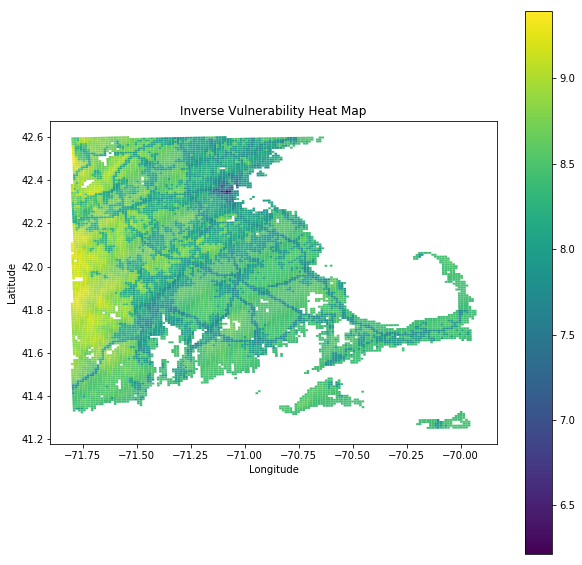

In [0]:
fig=plt.figure(figsize=[10,10])
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Inverse Vulnerability Heat Map')
game_grid.plot(ax = ax, column = 'Vulnerability', legend = True, cmap = 'RdYlGn')

#Hospitals

In [0]:
hospital_grid = gpd.read_file('game_grid_export/facilities/hospitals.shp')
hospital_grid['hos_radius (km)'] = 0
hospital_grid.loc[hospital_grid.loc[:, 'BEDS'] >= 200, 'hos_radius (km)'] = 25
hospital_grid.loc[hospital_grid.loc[:, 'BEDS'] < 200, 'hos_radius (km)'] = 15

In [0]:
hospital_grid

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,WEBSITE,OWNER,TTL_STAFF,BEDS,HELIPAD,geometry,hos_radius (km)
0,18.0,0006002401,VA MEDICAL CENTER - BROCKTON DIVISION,940 BELMONT ST,BROCKTON,MA,02401,MILITARY,OPEN,PLYMOUTH,25023,USA,42.063022,-71.053936,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.boston.va.gov/,GOVERNMENT - FEDERAL,-999.0,100.0,N,POINT Z (-71.05393558885629 42.06302243024101 0),15
1,20.0,0006802132,VA MEDICAL CENTER - WEST ROXBURY DIVISION,1400 VFW PKY,WEST ROXBURY,MA,02132,MILITARY,OPEN,SUFFOLK,25025,USA,42.274627,-71.171698,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.boston.va.gov/,GOVERNMENT - FEDERAL,-999.0,100.0,N,POINT Z (-71.1716980219461 42.27462729771167 0),15
2,24.0,0001102908,PROVIDENCE VA MEDICAL CENTER,830 CHALKSTONE AVE,PROVIDENCE,RI,02908,GENERAL ACUTE CARE,OPEN,PROVIDENCE,44007,USA,41.831937,-71.433575,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.providence.va.gov/,GOVERNMENT - FEDERAL,-999.0,73.0,NOT AVAILABLE,POINT Z (-71.43357465005005 41.831936947732 0),15
3,25.0,0001702896,REHABILITATION HOSPITAL OF RHODE ISLAND,116 EDDIE DOWLING HIGHWAY,NORTH SMITHFIELD,RI,02896,REHABILITATION,OPEN,PROVIDENCE,44007,USA,41.981578,-71.512844,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.rhri.net/home.aspx,PROPRIETARY,-999.0,70.0,NOT AVAILABLE,POINT Z (-71.51284391331592 41.98157825912944 0),15
4,26.0,0000902920,ELEANOR SLATER HOSPITAL,3 REGAN COURT,CRANSTON,RI,02920,PSYCHIATRIC,OPEN,PROVIDENCE,44007,USA,41.744705,-71.463225,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.bhddh.ri.gov/esh/index.php,GOVERNMENT - STATE,-999.0,495.0,Y,POINT Z (-71.46322471694708 41.74470515541861 0),25
5,27.0,0001602841,"NAVAL HEALTH CLINIC NEW ENGLAND, NEWPORT",43 SMITH ROAD,NEWPORT,RI,02841,GENERAL ACUTE CARE,OPEN,NEWPORT,44005,USA,41.503931,-71.321796,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://nhcne.med.navy.mil/locations/npri/npri.asp,GOVERNMENT - FEDERAL,-999.0,100.0,NOT AVAILABLE,POINT Z (-71.32179613138629 41.50393052197609 0),15
6,28.0,0013402908,VA MEDICAL CENTER - PROVIDENCE,830 CHALKSTONE AVE,PROVIDENCE,RI,02908,GENERAL ACUTE CARE,OPEN,PROVIDENCE,44007,USA,41.832139,-71.433150,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.providence.va.gov/,GOVERNMENT - FEDERAL,-999.0,100.0,N,POINT Z (-71.43314954501545 41.8321390838517 0),15
7,29.0,0001802886,KENT HOSPITAL,455 TOLL GATE ROAD,WARWICK,RI,02886,GENERAL ACUTE CARE,OPEN,KENT,44003,USA,41.705248,-71.478236,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.kentri.org/,NON-PROFIT,-999.0,306.0,Y,POINT Z (-71.47823583631475 41.70524808503114 0),25
8,30.0,0000302860,MEMORIAL HOSPITAL OF RHODE ISLAND,111 BREWSTER STREET,PAWTUCKET,RI,02860,GENERAL ACUTE CARE,OPEN,PROVIDENCE,44007,USA,41.869922,-71.376456,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.mhri.org/,NON-PROFIT,-999.0,294.0,NOT AVAILABLE,POINT Z (-71.37645644510883 41.8699220005999 0),25
9,31.0,0000602895,LANDMARK MEDICAL CENTER,115 CASS AVE,WOONSOCKET,RI,02895,GENERAL ACUTE CARE,OPEN,PROVIDENCE,44007,USA,42.004612,-71.495803,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.landmarkmedical.org/,NON-PROFIT,-999.0,214.0,Y,POINT Z (-71.49580333435637 42.00461190311688 0),25


In [0]:
game_grid['centroid'] = game_grid['geometry'].centroid

In [0]:
grid = game_grid.to_crs(epsg=3857)

In [0]:
to_m = lambda km: km * 1000

In [0]:
grid = game_grid.to_crs(epsg = 3857)
big_hospitals=hospital_grid[hospital_grid['BEDS']>=200].to_crs(grid.crs)
small_hospitals=hospital_grid[hospital_grid['BEDS']<200].to_crs(grid.crs)
hospitals_buffered = hospital_grid.copy().to_crs(grid.crs)
hospitals_buffered.loc[big_hospitals.index, 'geometry'] = hospitals_buffered.loc[big_hospitals.index,'geometry'].buffer(to_m(25))
hospitals_buffered.loc[small_hospitals.index, 'geometry'] = hospitals_buffered.loc[small_hospitals.index,'geometry'].buffer(to_m(15))

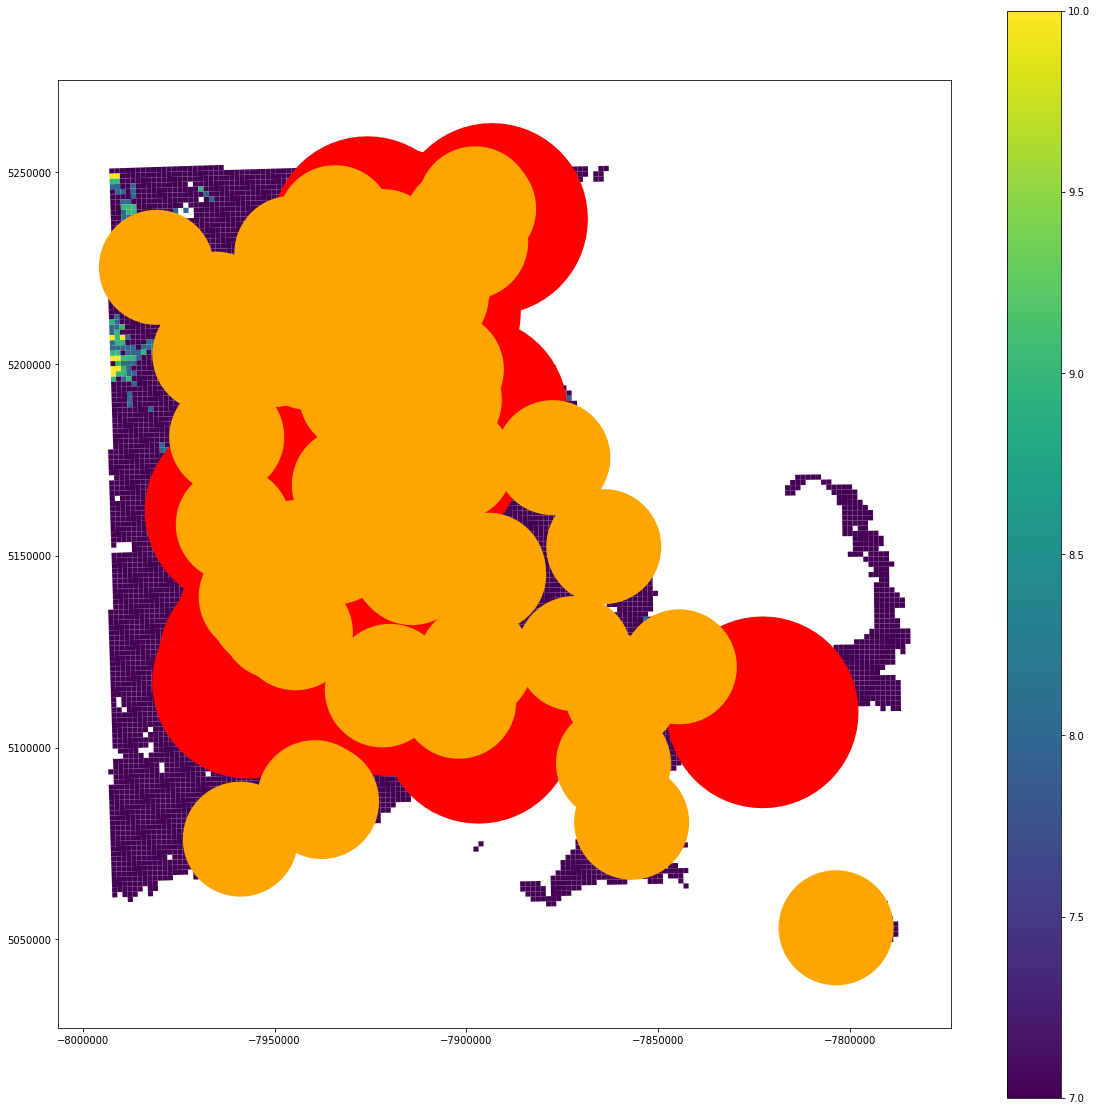

In [0]:
fig=plt.figure(figsize=[20,20])
ax=fig.add_subplot(1,1,1)
grid.plot(ax=ax, column='Utility', legend=True)
big_hospitals.buffer(to_m(25)).plot(color='red', ax=ax, zorder=15)
small_hospitals.buffer(to_m(15)).plot(color='orange', ax=ax, zorder=15)

In [0]:
grid

,MGRS,kmSQ_ID,GZD,EASTING,NORTHING,MGRS_10km,Shape_Leng,Shape_Le_1,Shape_Area,x_centroid,y_centroid,elevation,population,Health,Utility,Transporta,geometry,normalized_pop,normalized_ele,Vulnerability,centroid
0,19TBH7019,BH,19T,270000mE,4719000mN,19TBH71,0.042364,0.042364,0.000110,-71.797211,42.593785,196.344985,443,10,7,8,POLYGON ((-7991728.967600358 5249687.138847766...,0.419388,7.573497,8.573472,POINT (-71.79721070349959 42.59378480227186)
1,19TBH7119,BH,19T,271000mE,4719000mN,19TBH71,0.042364,0.042364,0.000110,-71.785036,42.594082,139.760744,381,10,7,8,"POLYGON ((-7990373.82476176 5249731.911598952,...",0.360693,5.390907,8.366952,POINT (-71.78503646680714 42.59408160214862)
2,19TBH7219,BH,19T,272000mE,4719000mN,19TBH71,0.042364,0.042364,0.000110,-71.772862,42.594377,144.429830,318,10,7,8,"POLYGON ((-7989018.661500301 5249776.4891565, ...",0.301051,5.571005,8.396890,POINT (-71.77286204643308 42.59437711020455)
3,19TBH7319,BH,19T,273000mE,4719000mN,19TBH71,0.042365,0.042365,0.000110,-71.760687,42.594671,154.567869,182,10,7,3,POLYGON ((-7987663.477916094 5249820.871653637...,0.172300,5.962054,8.961745,POINT (-71.760687442936 42.59467132605396)
4,19TBH7419,BH,19T,274000mE,4719000mN,19TBH71,0.042365,0.042365,0.000110,-71.748513,42.594964,176.765537,115,10,7,3,POLYGON ((-7986308.274109244 5249865.058951609...,0.108871,6.818271,9.060053,POINT (-71.74851265733594 42.59496425013775)
5,19TBH7519,BH,19T,275000mE,4719000mN,19TBH71,0.042365,0.042365,0.000110,-71.736338,42.595256,157.995852,147,10,7,3,POLYGON ((-7984953.050079757 5249909.051183662...,0.139165,6.094279,8.981595,POINT (-71.73633769038432 42.59525588194996)
6,19TBH7619,BH,19T,276000mE,4719000mN,19TBH71,0.042366,0.042366,0.000110,-71.724163,42.595546,162.169816,149,10,7,3,POLYGON ((-7983597.806127967 5249952.848211084...,0.141058,6.255279,8.997316,POINT (-71.72416254281677 42.59554622194236)
7,19TBH7719,BH,19T,277000mE,4719000mN,19TBH71,0.042366,0.042366,0.000110,-71.711987,42.595835,136.976414,122,10,7,3,POLYGON ((-7982242.542153758 5249996.450031156...,0.115497,5.283509,8.905251,POINT (-71.71198721558548 42.59583526933271)
8,19TBH7819,BH,19T,278000mE,4719000mN,19TBH71,0.042366,0.042366,0.000110,-71.699812,42.596123,120.885051,111,10,7,3,POLYGON ((-7980887.258357366 5250039.856777146...,0.105084,4.662826,8.845266,POINT (-71.69981170950958 42.59612302483837)
9,19TBH7919,BH,19T,279000mE,4719000mN,19TBH71,0.042366,0.042366,0.000110,-71.687636,42.596409,115.449512,137,10,7,3,POLYGON ((-7979531.954738783 5250083.068310369...,0.129698,4.453165,8.819377,POINT (-71.68763602512868 42.59640948785247)


In [0]:
hospitals_buffered

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,WEBSITE,OWNER,TTL_STAFF,BEDS,HELIPAD,geometry,hos_radius (km)
0,18.0,0006002401,VA MEDICAL CENTER - BROCKTON DIVISION,940 BELMONT ST,BROCKTON,MA,02401,MILITARY,OPEN,PLYMOUTH,25023,USA,42.063022,-71.053936,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.boston.va.gov/,GOVERNMENT - FEDERAL,-999.0,100.0,N,POLYGON ((-7894687.928609542 5170424.578357815...,15
1,20.0,0006802132,VA MEDICAL CENTER - WEST ROXBURY DIVISION,1400 VFW PKY,WEST ROXBURY,MA,02132,MILITARY,OPEN,SUFFOLK,25025,USA,42.274627,-71.171698,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.boston.va.gov/,GOVERNMENT - FEDERAL,-999.0,100.0,N,POLYGON ((-7907797.182695676 5202206.466753596...,15
2,24.0,0001102908,PROVIDENCE VA MEDICAL CENTER,830 CHALKSTONE AVE,PROVIDENCE,RI,02908,GENERAL ACUTE CARE,OPEN,PROVIDENCE,44007,USA,41.831937,-71.433575,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.providence.va.gov/,GOVERNMENT - FEDERAL,-999.0,73.0,NOT AVAILABLE,POLYGON ((-7936949.155586868 5135837.564535611...,15
3,25.0,0001702896,REHABILITATION HOSPITAL OF RHODE ISLAND,116 EDDIE DOWLING HIGHWAY,NORTH SMITHFIELD,RI,02896,REHABILITATION,OPEN,PROVIDENCE,44007,USA,41.981578,-71.512844,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.rhri.net/home.aspx,PROPRIETARY,-999.0,70.0,NOT AVAILABLE,POLYGON ((-7945773.369609181 5158220.355916483...,15
4,26.0,0000902920,ELEANOR SLATER HOSPITAL,3 REGAN COURT,CRANSTON,RI,02920,PSYCHIATRIC,OPEN,PROVIDENCE,44007,USA,41.744705,-71.463225,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.bhddh.ri.gov/esh/index.php,GOVERNMENT - STATE,-999.0,495.0,Y,POLYGON ((-7930249.785935831 5122813.896565473...,25
5,27.0,0001602841,"NAVAL HEALTH CLINIC NEW ENGLAND, NEWPORT",43 SMITH ROAD,NEWPORT,RI,02841,GENERAL ACUTE CARE,OPEN,NEWPORT,44005,USA,41.503931,-71.321796,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://nhcne.med.navy.mil/locations/npri/npri.asp,GOVERNMENT - FEDERAL,-999.0,100.0,NOT AVAILABLE,"POLYGON ((-7924506.027807591 5086957.87205448,...",15
6,28.0,0013402908,VA MEDICAL CENTER - PROVIDENCE,830 CHALKSTONE AVE,PROVIDENCE,RI,02908,GENERAL ACUTE CARE,OPEN,PROVIDENCE,44007,USA,41.832139,-71.433150,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.providence.va.gov/,GOVERNMENT - FEDERAL,-999.0,100.0,N,POLYGON ((-7936901.833110882 5135867.763963762...,15
7,29.0,0001802886,KENT HOSPITAL,455 TOLL GATE ROAD,WARWICK,RI,02886,GENERAL ACUTE CARE,OPEN,KENT,44003,USA,41.705248,-71.478236,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.kentri.org/,NON-PROFIT,-999.0,306.0,Y,POLYGON ((-7931920.816100077 5116928.786007559...,25
8,30.0,0000302860,MEMORIAL HOSPITAL OF RHODE ISLAND,111 BREWSTER STREET,PAWTUCKET,RI,02860,GENERAL ACUTE CARE,OPEN,PROVIDENCE,44007,USA,41.869922,-71.376456,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.mhri.org/,NON-PROFIT,-999.0,294.0,NOT AVAILABLE,"POLYGON ((-7920590.786097784 5141514.2622464, ...",25
9,31.0,0000602895,LANDMARK MEDICAL CENTER,115 CASS AVE,WOONSOCKET,RI,02895,GENERAL ACUTE CARE,OPEN,PROVIDENCE,44007,USA,42.004612,-71.495803,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.landmarkmedical.org/,NON-PROFIT,-999.0,214.0,Y,"POLYGON ((-7933876.421036582 5161670.30980682,...",25


In [0]:
hosp_info = gpd.sjoin(grid, hospitals_buffered, how = 'inner', op = 'intersects')
hosp_info

,MGRS,kmSQ_ID,GZD,EASTING,NORTHING,MGRS_10km,Shape_Leng,Shape_Le_1,Shape_Area,x_centroid,y_centroid,elevation,population,Health,Utility,Transporta,geometry,normalized_pop,normalized_ele,Vulnerability,centroid,index_right,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,WEBSITE,OWNER,TTL_STAFF,BEDS,HELIPAD,hos_radius (km)
57,19TCH0518,CH,19T,305000mE,4718000mN,19TCH01,0.042371,0.042371,0.000110,-71.370667,42.594406,63.562291,362,10,7,10,POLYGON ((-7944249.520794641 5249777.375488092...,0.342706,2.451750,7.876634,POINT (-71.37066701372541 42.59440576090294),102,244.0,0008001805,LAHEY CLINIC MEDICAL CENTER,41 MALL ROAD,BURLINGTON,MA,01805,GENERAL ACUTE CARE,OPEN,MIDDLESEX,25017,USA,42.4883,-71.1989,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.lahey.org,NON-PROFIT,-999.0,327.0,NOT AVAILABLE,25
58,19TCH0618,CH,19T,306000mE,4718000mN,19TCH01,0.042371,0.042371,0.000110,-71.358489,42.594657,54.021660,339,10,7,10,POLYGON ((-7942893.911433787 5249815.295817629...,0.320932,2.083745,7.844188,POINT (-71.35848857102313 42.59465723377419),102,244.0,0008001805,LAHEY CLINIC MEDICAL CENTER,41 MALL ROAD,BURLINGTON,MA,01805,GENERAL ACUTE CARE,OPEN,MIDDLESEX,25017,USA,42.4883,-71.1989,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.lahey.org,NON-PROFIT,-999.0,327.0,NOT AVAILABLE,25
59,19TCH0718,CH,19T,307000mE,4718000mN,19TCH01,0.042371,0.042371,0.000110,-71.346310,42.594907,39.349350,793,10,8,7,"POLYGON ((-7941538.284753544 5249853.02089182,...",0.750734,1.517799,8.101633,POINT (-71.34630997294076 42.59490741341201),102,244.0,0008001805,LAHEY CLINIC MEDICAL CENTER,41 MALL ROAD,BURLINGTON,MA,01805,GENERAL ACUTE CARE,OPEN,MIDDLESEX,25017,USA,42.4883,-71.1989,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.lahey.org,NON-PROFIT,-999.0,327.0,NOT AVAILABLE,25
60,19TCH0818,CH,19T,308000mE,4718000mN,19TCH01,0.042372,0.042372,0.000110,-71.334131,42.595156,37.860303,211,10,7,8,POLYGON ((-7940182.640954138 5249890.550572351...,0.199754,1.460363,8.006086,POINT (-71.33413121976005 42.59515629999893),102,244.0,0008001805,LAHEY CLINIC MEDICAL CENTER,41 MALL ROAD,BURLINGTON,MA,01805,GENERAL ACUTE CARE,OPEN,MIDDLESEX,25017,USA,42.4883,-71.1989,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.lahey.org,NON-PROFIT,-999.0,327.0,NOT AVAILABLE,25
61,19TCH0918,CH,19T,309000mE,4718000mN,19TCH01,0.042372,0.042372,0.000110,-71.321952,42.595404,38.548673,81,10,7,10,POLYGON ((-7938826.979935453 5249927.884720897...,0.076683,1.486915,7.833355,POINT (-71.32195231222781 42.5954038929189),102,244.0,0008001805,LAHEY CLINIC MEDICAL CENTER,41 MALL ROAD,BURLINGTON,MA,01805,GENERAL ACUTE CARE,OPEN,MIDDLESEX,25017,USA,42.4883,-71.1989,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.lahey.org,NON-PROFIT,-999.0,327.0,NOT AVAILABLE,25
62,19TCH1018,CH,19T,310000mE,4718000mN,19TCH11,0.042372,0.042372,0.000110,-71.309773,42.595650,35.097525,203,10,7,10,POLYGON ((-7937471.301997836 5249965.023607099...,0.192180,1.353796,7.796944,POINT (-71.3097732519022 42.59565019254249),102,244.0,0008001805,LAHEY CLINIC MEDICAL CENTER,41 MALL ROAD,BURLINGTON,MA,01805,GENERAL ACUTE CARE,OPEN,MIDDLESEX,25017,USA,42.4883,-71.1989,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.lahey.org,NON-PROFIT,-999.0,327.0,NOT AVAILABLE,25
63,19TCH1118,CH,19T,311000mE,4718000mN,19TCH11,0.042373,0.042373,0.000110,-71.297594,42.595895,33.185666,334,10,7,8,POLYGON ((-7936115.607141269 5250001.967092664...,0.316198,1.280051,7.964765,POINT (-71.29759403915965 42.59589519889386),102,244.0,0008001805,LAHEY CLINIC MEDICAL CENTER,41 MALL ROAD,BURLINGTON,MA,01805,GENERAL ACUTE CARE,OPEN,MIDDLESEX,25017,USA,42.4883,-71.1989,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.lahey.org,NON-PROFIT,-999.0,327.0,NOT AVAILABLE,25
64,19TCH1218,CH,19T,312000mE,4718000mN,19TCH11,0.042373,0.042373,0.000110,-71.285415,42.596139,36.311988,319,10,7,8,POLYGON ((-7934759.895465882 5250038.715039308...,0.301998,1.4006

In [0]:
hosp_infopop = hosp_info.groupby('NAME').sum()

In [0]:
alpha_hosp = hospitals_buffered.sort_values('NAME').set_index('NAME')
alpha_hosp['population'] = hosp_infopop['population'].values
alpha_hosp

,OBJECTID,ID,ADDRESS,CITY,STATE,ZIP,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,WEBSITE,OWNER,TTL_STAFF,BEDS,HELIPAD,geometry,hos_radius (km),population
NAME,,,,,,,,,,,,,,,,,,,,,,,
ARBOUR FULLER HOSPITAL,48.0,0009802703,200 MAY STREET,ATTLEBORO,MA,02703,PSYCHIATRIC,OPEN,BRISTOL,25005,USA,41.924084,-71.361123,622210,"HOSPITALS, PSYCHIATRIC (EXCEPT CONVALESCENT)",http://arbourhealth.com/organizations/arbour-f...,PROPRIETARY,-999.0,103.0,NOT AVAILABLE,POLYGON ((-7928883.826011147 5149614.347394856...,15,216673
"ARBOUR HOSPITAL, THE",83.0,0009602130,49 ROBINWOOD AVENUE,BOSTON,MA,02130,PSYCHIATRIC,OPEN,SUFFOLK,25025,USA,42.315818,-71.112273,622210,"HOSPITALS, PSYCHIATRIC (EXCEPT CONVALESCENT)",http://arbourhealth.com/organizations/arbour-h...,PROPRIETARY,-999.0,136.0,NOT AVAILABLE,POLYGON ((-7901182.035051757 5208405.537795069...,15,778984
ARBOUR HUMAN RESOURCE INSTITUTE,49.0,0009702146,227 BABCOCK STREET,BROOKLINE,MA,02146,PSYCHIATRIC,OPEN,NORFOLK,25021,USA,42.350780,-71.121242,622210,"HOSPITALS, PSYCHIATRIC (EXCEPT CONVALESCENT)",http://arbourhealth.com/organizations/arbour-h...,PROPRIETARY,-999.0,66.0,NOT AVAILABLE,POLYGON ((-7902180.475273305 5213670.205903835...,15,869992
BAY RIDGE HOSPITAL BEVERLY,62.0,0012101904,60 GRANITE STREET,LYNN,MA,01904,PSYCHIATRIC,OPEN,ESSEX,25009,USA,42.471620,-70.956761,622210,"HOSPITALS, PSYCHIATRIC (EXCEPT CONVALESCENT)",http://www.beverlyhospital.org/locations--serv...,NON-PROFIT,-999.0,62.0,NOT AVAILABLE,POLYGON ((-7883870.495242609 5231889.753167046...,15,352378
BETH ISRAEL DEACONESS HOSPITAL - NEEDHAM,67.0,0003502492,148 CHESTNUT STREET,NEEDHAM,MA,02492,GENERAL ACUTE CARE,OPEN,NORFOLK,25021,USA,42.277100,-71.236900,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.bidmc.org/CentersandDepartments/Dep...,NON-PROFIT,-999.0,58.0,NOT AVAILABLE,POLYGON ((-7915055.433672992 5202578.482613695...,15,330194
BETH ISRAEL DEACONESS HOSPITAL MILTON,178.0,0006302186,199 REEDSDALE ROAD,MILTON,MA,02186,GENERAL ACUTE CARE,OPEN,NORFOLK,25021,USA,42.251300,-71.077200,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.miltonhospital.org/,NON-PROFIT,-999.0,88.0,NOT AVAILABLE,POLYGON ((-7897277.710987189 5198697.613445255...,15,501945
BETH ISRAEL DEACONESS HOSPITAL PLYMOUTH,256.0,0004302360,275 SANDWICH STREET,PLYMOUTH,MA,02360,GENERAL ACUTE CARE,OPEN,PLYMOUTH,25023,USA,41.942800,-70.645100,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.bidplymouth.org/,NON-PROFIT,-999.0,155.0,Y,POLYGON ((-7849176.559002622 5152415.008695212...,15,38508
BETH ISRAEL DEACONESS MEDICAL CENTER - EAST CAMPUS,208.0,0000502215,330 BROOKLINE AVENUE,BOSTON,MA,02215,GENERAL ACUTE CARE,OPEN,SUFFOLK,25025,USA,42.339500,-71.105100,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.bidmc.harvard.edu,NON-PROFIT,-999.0,649.0,NOT AVAILABLE,"POLYGON ((-7890383.524845394 5211971.34478531,...",25,1208502
BETH ISRAEL DEACONESS MEDICAL CENTER - WEST CAMPUS,81.0,0001202215,ONE DEACONESS RD,BOSTON,MA,02215,GENERAL ACUTE CARE,OPEN,SUFFOLK,25025,USA,42.337900,-71.109200,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.bidmc.harvard.edu,NON-PROFIT,-999.0,405.0,Y,POLYGON ((-7890839.934681447 5211730.385925083...,25,1200722


In [0]:
alpha_hosp['population']

NAME
ARBOUR FULLER HOSPITAL                                      216673
ARBOUR HOSPITAL, THE                                        778984
ARBOUR HUMAN RESOURCE INSTITUTE                             869992
BAY RIDGE HOSPITAL BEVERLY                                  352378
BETH ISRAEL DEACONESS HOSPITAL - NEEDHAM                    330194
BETH ISRAEL DEACONESS HOSPITAL MILTON                       501945
BETH ISRAEL DEACONESS HOSPITAL PLYMOUTH                      38508
BETH ISRAEL DEACONESS MEDICAL CENTER - EAST CAMPUS         1208502
BETH ISRAEL DEACONESS MEDICAL CENTER - WEST CAMPUS         1200722
BOSTON MEDICAL CENTER - EAST NEWTON CAMPUS                 1216527
BOSTON MEDICAL CENTER - MENINO CAMPUS                      1217093
BOURNEWOOD HOSPITAL                                         712321
BRIGHAM AND WOMEN'S HOSPITAL                               1204412
CAMBRIDGE HEALTH ALLIANCE - CAMBRIDGE CAMPUS               1222459
CAMBRIDGE HEALTH ALLIANCE - SOMERVILLE CAMPUS            

#Set Cover Application Algorithm

In [0]:
large_hos_cost = 200
small_hos_cost = 100

cost_ref = {'small': small_hos_cost, 'big': large_hos_cost}

In [0]:
hosp_to_cells = {}
for i, row in hosp_info.iterrows():
  hosp_name = row["NAME"]
  size = 'small' if row['BEDS'] < 200 else 'big'
  if hosp_name not in hosp_to_cells:
    hosp_to_cells[(hosp_name, size)] = {i}
  else:
    hosp_to_cells[(hosp_name, size)].add(i)

In [0]:
hosp_to_cells

{('ARBOUR FULLER HOSPITAL', 'small'): {7429},
 ('ARBOUR HOSPITAL, THE', 'small'): {3292},
 ('ARBOUR HUMAN RESOURCE INSTITUTE', 'small'): {2951},
 ('BAY RIDGE HOSPITAL BEVERLY', 'small'): {2014},
 ('BETH ISRAEL DEACONESS HOSPITAL - NEEDHAM', 'small'): {3638},
 ('BETH ISRAEL DEACONESS HOSPITAL MILTON', 'small'): {3920},
 ('BETH ISRAEL DEACONESS HOSPITAL PLYMOUTH', 'small'): {7384},
 ('BETH ISRAEL DEACONESS MEDICAL CENTER - EAST CAMPUS', 'big'): {3653},
 ('BETH ISRAEL DEACONESS MEDICAL CENTER - WEST CAMPUS', 'big'): {3737},
 ('BOSTON MEDICAL CENTER - EAST NEWTON CAMPUS', 'big'): {3742},
 ('BOSTON MEDICAL CENTER - MENINO CAMPUS', 'big'): {3744},
 ('BOURNEWOOD HOSPITAL', 'small'): {3380},
 ("BRIGHAM AND WOMEN'S HOSPITAL", 'big'): {3740},
 ('CAMBRIDGE HEALTH ALLIANCE - CAMBRIDGE CAMPUS', 'big'): {3297},
 ('CAMBRIDGE HEALTH ALLIANCE - SOMERVILLE CAMPUS', 'small'): {2601},
 ('CAMBRIDGE HEALTH ALLIANCE - WHIDDEN MEMORIAL CAMPUS', 'small'): {2471},
 ('CAPE COD & ISLANDS COMMUNITY MENTAL HEALTH C

In [0]:
hosp_to_cells
freq_chart = [0 for _ in range(game_grid.shape[0])]
covered = set()

def calc_weight(subset, size):
  return sum(grid.loc[cell, 'population'] for cell in subset) / cost_ref[size]

    
    
def set_cover(budget, hosp_squares):#TODO: add cost_ref
  to_ret = set()
  while budget > 0:
    max_hosp, max_subset = max(hosp_squares.items(), key = lambda tup: \
                               calc_weight(tup[1], tup[0][1]))
    for cell in max_subset:
      freq_chart[cell] += 1
      /if freq_chart[cell] == 2:
      /  covered.add(cell)
    
    budget -= cost_ref[max_hosp[1]]
    to_ret.add(max_hosp)
    
    for key in hosp_squares:
      hosp_squares[key] -= max_subset
    del hosp_squares[max_hosp]
      
  return to_ret

SyntaxError: ignored

In [0]:
flood_range = 500
flooding2 = flooding.copy().to_crs(grid.crs)
flooding2['geometry'] = flooding2['geometry'].buffer(flood_range)

In [0]:
flood_poly = flooding2.unary_union
print(type(flood_poly))

<class 'shapely.geometry.multipolygon.MultiPolygon'>


In [0]:
'''
parameters: would be one, like the closest you could be to a flood, and the second
one would be how far, like how the farthest you can be from the flood. Basically,
Deteremine the hospitals that the operations want to use, basically.

Sort it by population, and he already made the population column which each hosptial can hit.
Priotirize where the hospitals can help. This is kind of extra, but if I can,
I will determine if it's possible to open the hospitals with utility score. 
You need a minimum utility score to actually open a hospital. 
'''
def operator_hospitals(min_d, max_d, flood_poly):
  # Loop through all hospitals, see if the hospital in loop is in range
  hosp_list = []
  for i in range(len(hospital_grid)):
    dist = flood.exterior.distance(hopsital_grid.loc[i, 'geometry'])
    if dist < maxdist and dist > mindist:
      hosp_list.append(hospital_grid.loc[i, 'NAME'])
  return hosp_list
  
  
  

In [0]:
from shapely.geometry import MultiPolygon
import shapely.ops as shap

In [0]:
def fl_create(fl, b, i = 0):
  flooding = fl.copy().to_crs(grid.crs)
  flooding['geometry'] = flooding['geometry'].buffer(b)
  if i == 0:
    flood = flooding['geometry'].unary_union
  else:
    l = [MultiPolygon([flooding.loc[i, 'geometry'], \
                      flooding.loc[i + 1, 'geometry']]).convex_hull \
         for i in range(len(flooding) - 1)]
    flood = shap.cascaded_union(MultiPolygon(l))
  return flood

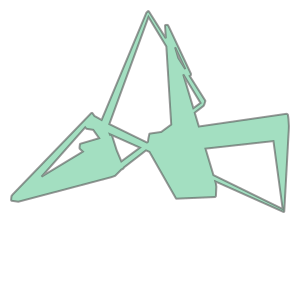

In [0]:
fl_create(flooding, 500, 1)

# Evacuation

In [5]:
ls

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*
